# Assessing suitability of a location for thermal property glass

## Introduction

## Import needed tools

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

## Read in the weather station data

### Create variables to make it easier to choose the country and region of interest

In [33]:
country = df['country'].unique()
print(f"The countries within the file are: {country}")


The countries within the file are: ['CA' 'NO' 'SE' 'FI' 'DE' 'GB' 'IE' 'IS' 'GL' 'US' 'DK' 'NL' 'BE' 'LU'
 'CH' 'CN' 'LI' 'FR' 'PT' 'ES' 'GI' 'CV' 'AT' 'CZ' 'SK' 'PL' 'HU' 'RS'
 'SI' 'HR' 'BA' 'CS' 'MK' 'AL' 'RO' 'BG' 'IT' 'MT' 'GR' 'TR' 'CY' 'RU'
 'EE' 'LV' 'LT' 'BY' 'KZ' 'UA' 'MD' 'KG' 'GE' 'AZ' 'AM' 'UZ' 'TM' 'TJ'
 'SY' 'LB' 'IL' 'JO' 'SA' 'KW' 'IQ' 'IR' 'AF' 'BH' 'QA' 'AE' 'OM' 'YE'
 'PK' 'BD' 'IN' 'LK' 'MV' 'MN' 'NP' 'HK' 'MO' 'TW' 'KP' 'KR' 'JP' 'MM'
 'TH' 'MY' 'SG' 'VN' 'LA' 'KH' 'MA' 'EH' 'DZ' 'TN' 'NE' 'ML' 'MR' 'SN'
 'GM' 'GW' 'GN' 'SL' 'SH' 'ST' 'IO' 'RE' 'MU' 'TF' 'LY' 'EG' 'SD' 'ER'
 'ET' 'DJ' 'SO' 'UG' 'KE' 'TZ' 'SC' 'CD' 'RW' 'BI' 'CG' 'GA' 'CF' 'TD'
 'GQ' 'CM' 'NG' 'BJ' 'TG' 'GH' 'BF' 'CI' 'LR' 'AO' 'KM' 'MG' 'MZ' 'ZM'
 'MW' 'ZW' 'NA' 'BW' 'ZA' 'SZ' 'LS' 'BV' 'CO' 'PM' 'MX' 'BM' 'BS' 'TC'
 'CU' 'KY' 'JM' 'HT' 'DO' 'HN' 'PR' 'VI' 'VG' 'BZ' 'GT' 'SV' 'NI' 'CR'
 'PA' 'KN' 'AG' 'AN' 'GP' 'DM' 'MQ' 'LC' 'VC' 'BB' 'GD' 'TT' 'AW' 'VE'
 'GY' 'SR' 'GF' 'BR' 'EC' 'PE' 'BO' 'CL' '

In [31]:
df = pd.read_json("https://bulk.meteostat.net/v2/stations/lite.json.gz")

In [32]:
print(df.head(5))

      id                   name country region  \
0  00FAY  {'en': 'Holden Agdm'}      CA     AB   
1  00TG6  {'en': 'Athabasca 1'}      CA     AB   
2  01001    {'en': 'Jan Mayen'}      NO   None   
3  01002     {'en': 'Grahuken'}      NO     SJ   
4  01003     {'en': 'Hornsund'}      NO   None   

                                         identifiers  \
0  {'national': '32395', 'wmo': '71227', 'icao': ...   
1    {'national': '2459', 'wmo': None, 'icao': None}   
2  {'national': None, 'wmo': '01001', 'icao': 'EN...   
3   {'national': None, 'wmo': '01002', 'icao': None}   
4   {'national': None, 'wmo': '01003', 'icao': None}   

                                            location          timezone  \
0  {'latitude': 53.19, 'longitude': -112.25, 'ele...  America/Edmonton   
1  {'latitude': 54.72, 'longitude': -113.29, 'ele...  America/Edmonton   
2  {'latitude': 70.9333, 'longitude': -8.6667, 'e...       Europe/Oslo   
3  {'latitude': 79.7833, 'longitude': 14.4667, 'e...       Europe/

## Prompt user to request the location of interest


In [34]:
# chosencountry = input("Enter the country of interest: ")
chosencountry = "CA"

In [35]:
countrydf = df[df['country'] == chosencountry]

In [37]:
print(countrydf['region'].unique())
#chosenregion = input("Enter the region of interest: ") 
chosenregion = "ON"

['AB' 'MB' 'SK' 'BC' 'NU' 'YT' 'QC' 'ON' 'NS' 'NL' 'NT' 'PE' 'NB' 'SD'
 'NF']


## Create a new dataframe of the weather stations in the country and region of interest

In [38]:
areaofinterest = df[df["region"] == chosenregion]
print(areaofinterest.head)

<bound method NDFrame.head of           id                           name country region  \
1211   0CNUO          {'en': 'Rawson Lake'}      CA     ON   
1212   0CO7B       {'en': 'Kingsville Moe'}      CA     ON   
1216   0FV1F     {'en': 'Tillsonburg Wwtp'}      CA     ON   
1217   0FV2W         {'en': 'Mountainview'}      CA     ON   
1549   10RIK       {'en': 'Brockville Pcc'}      CA     ON   
...      ...                            ...     ...    ...   
15791  Y7KHS     {'en': 'Red Lake Airport'}      CA     ON   
15869  ZFS01   {'en': 'Lyndhurst Shawmere'}      CA     ON   
15898  ZSOGU  {'en': 'Pickle Lake Airport'}      CA     ON   
15912  ZWC6W  {'en': 'Kapuskasing Airport'}      CA     ON   
15917  ZYC17     {'en': 'Kingston Airport'}      CA     ON   

                                            identifiers  \
1211    {'national': '3966', 'wmo': None, 'icao': None}   
1212    {'national': '4647', 'wmo': None, 'icao': None}   
1216    {'national': '4699', 'wmo': None, 'icao'

In [53]:
listofstations = areaofinterest['id'].unique()

## Pass in each weather station ID


### Create the column names


In [60]:
date = "Date"
tavg = "Average air temperature in Celsius"
#tmin = "Minimum air temperature in Celsius"
#tmax = "Maximum air temperature in Celsius"
#sun = "Daily sunshine in minutes"

## Weather station data for weather station 1211
https://dev.meteostat.net/bulk/daily.html#endpoints

In [64]:
station1211 = pd.read_csv("https://bulk.meteostat.net/v2/daily/0CNUO.csv.gz", usecols = [0,1], names =[date, tavg], parse_dates =['Date'])
print(station1211.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8014 entries, 0 to 8013
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8014 non-null   datetime64[ns]
 1   Average air temperature in Celsius  8010 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 125.3 KB
None


### Average the data by month

In [75]:
monthly_avg= station1211.groupby(pd.Grouper(key='Date', axis=0, freq='ME')).mean() 
print(monthly_avg)

            Average air temperature in Celsius
Date                                          
2000-01-31                          -15.854839
2000-02-29                           -8.255172
2000-03-31                           -0.751613
2000-04-30                            3.206667
2000-05-31                           11.374194
...                                        ...
2024-08-31                           19.642308
2024-09-30                           17.703704
2024-10-31                            8.261290
2024-11-30                            0.396667
2024-12-31                           -8.287500

[300 rows x 1 columns]


### Plot the data

## Regression and Scikit Learn
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

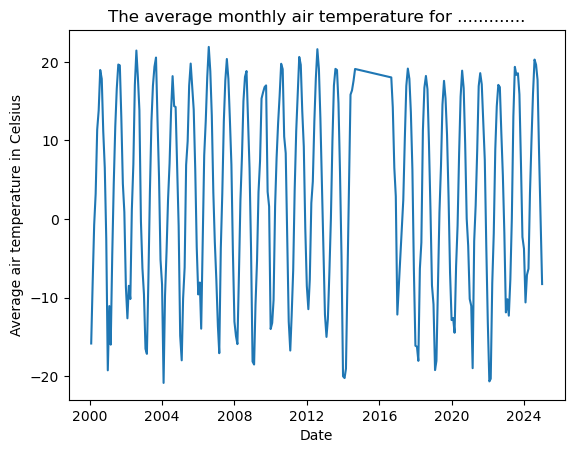

In [79]:
sns.lineplot(data = monthly_avg, x=date, y="Average air temperature in Celsius")
plt.title(f"The average monthly air temperature for .............")

plt.show()

# Sci Kit Learn
https://www.askpython.com/python/examples/weather-data-clustering

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

%matplotlib inline


## Load the dataset

In [100]:
date = "Date"
tavg = "Average air temperature in Celsius"
tmin = "Minimum air temperature in Celsius"
tmax = "Maximum air temperature in Celsius"

station1211 = pd.read_csv("https://bulk.meteostat.net/v2/daily/0CNUO.csv.gz", usecols = [0,1,2,3], names =[date, tavg, tmin, tmax],parse_dates=[0])
#station1211["id"] = df.index + 1
print(station1211.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8014 entries, 0 to 8013
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8014 non-null   datetime64[ns]
 1   Average air temperature in Celsius  8010 non-null   float64       
 2   Minimum air temperature in Celsius  8011 non-null   float64       
 3   Maximum air temperature in Celsius  8013 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 250.6 KB
None


## Sample the data

In [101]:
sampled_df = station1211[(station1211['Date'] % 2) == 0]
sampled_df.shape

#sampled_df.set_index('Date', inplace=True)

# del sampled_df['Average air temperature in Celsius']
# del sampled_df['Maximum air temperature in Celsius']
 


TypeError: cannot perform __mod__ with this index type: DatetimeArray

In [ ]:
B = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
A = sampled_df.shape[0]
 
print("No of rows deleted: ", B-A)

In [109]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Load Data
url = "https://bulk.meteostat.net/v2/daily/0CNUO.csv.gz"
df = pd.read_csv(url, compression='gzip', usecols=[0,1,2,3], names =[date, tavg, tmin, tmax])
df.info()

# Step 2: Select First Four Columns
#df = df[0,1,2,3]

# Step 3: Handle Missing Values
df.dropna(inplace=True)

# Step 4: Add Cyclical Features for Date
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_year'] = df['Date'].dt.dayofyear
df['sin_day'] = np.sin(2 * np.pi * df['day_of_year'] / 365.0)
df['cos_day'] = np.cos(2 * np.pi * df['day_of_year'] / 365.0)

# Step 5: Prepare Data for Clustering
features = ['tavg', 'tmin', 'tmax', 'sin_day', 'cos_day']
X = df[features]

# Step 6: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 7: Visualize Clusters
plt.figure(figsize=(10, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['day_of_year'], cluster_data['tavg'], label=f'Cluster {cluster}')
    
plt.title('KMeans Clustering of Weather Data')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8014 entries, 0 to 8013
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8014 non-null   object 
 1   Average air temperature in Celsius  8010 non-null   float64
 2   Minimum air temperature in Celsius  8011 non-null   float64
 3   Maximum air temperature in Celsius  8013 non-null   float64
dtypes: float64(3), object(1)
memory usage: 250.6+ KB


KeyError: "['tavg', 'tmin', 'tmax'] not in index"